https://www.kaggle.com/code/abdallahhassann/california-housing-data-preprocessing-and-modeling

# **Imports**

In [30]:
import torch
from torch import nn, optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score

# **Load Dataset**

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
!cp /content/drive/MyDrive/DeepLearning02/session1regression/data/train.csv train.csv

!cp /content/drive/MyDrive/DeepLearning02/session1regression/data/test.csv test.csv

In [44]:
df_train = pd.read_csv("/content/train.csv")
x_train = df_train.drop('MedHouseVal', axis=1)
y_train = df_train['MedHouseVal']

In [45]:
df_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,1.4817,6,4.443645,1.134293,1397,3.350120,36.77,-119.84,0.720
1,6.9133,8,5.976471,1.026471,862,2.535294,33.68,-117.80,2.741
2,1.5536,25,4.088785,1.000000,931,4.350467,36.60,-120.19,0.583
3,1.5284,31,2.740088,1.008811,597,2.629956,34.10,-118.32,2.000
4,4.0815,21,5.166667,1.002688,1130,3.037634,37.79,-121.23,1.179


In [46]:
x_train.shape

(16512, 8)

In [47]:
y_train

0        0.720
1        2.741
2        0.583
3        2.000
4        1.179
         ...  
16507    0.938
16508    1.031
16509    1.926
16510    1.535
16511    0.811
Name: MedHouseVal, Length: 16512, dtype: float64

## Test

In [48]:
df_test = pd.read_csv("/content/test.csv")
x_test = df_test.drop('MedHouseVal', axis=1)
y_test = df_test['MedHouseVal']

# **Preprocessing**

## Convert to tensor

### Train

In [49]:
x_train.values

array([[   1.4817    ,    6.        ,    4.44364508, ...,    3.3501199 ,
          36.77      , -119.84      ],
       [   6.9133    ,    8.        ,    5.97647059, ...,    2.53529412,
          33.68      , -117.8       ],
       [   1.5536    ,   25.        ,    4.08878505, ...,    4.35046729,
          36.6       , -120.19      ],
       ...,
       [   4.4958    ,   19.        ,    5.8997669 , ...,    2.81118881,
          38.92      , -121.22      ],
       [   2.575     ,   39.        ,    3.5912031 , ...,    3.29366106,
          34.16      , -118.14      ],
       [   2.2478    ,   31.        ,    5.12380952, ...,    2.99761905,
          40.8       , -124.13      ]])

In [50]:
x_train = torch.tensor(x_train.values, dtype=torch.float32)

In [51]:
y_train = torch.tensor(y_train.values, dtype=torch.float32) #First point

### Test

In [52]:
x_test = torch.FloatTensor(x_test.values)
y_test = torch.FloatTensor(y_test.values) #First point

## Normalize

In [53]:
mu = x_train.mean(dim=0)
std = x_train.std(dim=0)

In [54]:
x_train = (x_train - mu) / std

In [55]:
x_train.std(dim=0)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])

In [56]:
x_test = (x_test - mu) / std

In [57]:
x_test.mean(dim=0)

tensor([ 0.0174,  0.0059,  0.0357,  0.0232, -0.0412, -0.0045,  0.0125, -0.0141])

In [58]:
x_test.std(dim=0)

tensor([1.0173, 0.9952, 1.3752, 1.2463, 0.8829, 0.7154, 0.9926, 0.9963])

# **Dataloader**

In [59]:
train_dataset = TensorDataset(x_train, y_train)

In [60]:
train_dataset

In [61]:
train_dataset.tensors

(tensor([[-1.2584, -1.7959, -0.4252,  ...,  0.0247,  0.5345, -0.1376],
         [ 1.6106, -1.6371,  0.2473,  ..., -0.0499, -0.9100,  0.8798],
         [-1.2204, -0.2877, -0.5809,  ...,  0.1162,  0.4551, -0.3122],
         ...,
         [ 0.3337, -0.7640,  0.2137,  ..., -0.0246,  1.5396, -0.8259],
         [-0.6809,  0.8236, -0.7992,  ...,  0.0195, -0.6856,  0.7102],
         [-0.8537,  0.1886, -0.1268,  ..., -0.0076,  2.4185, -2.2772]]),
 tensor([0.7200, 2.7410, 0.5830,  ..., 1.9260, 1.5350, 0.8110]))

In [62]:
train_dataset.tensors[1]

tensor([0.7200, 2.7410, 0.5830,  ..., 1.9260, 1.5350, 0.8110])

In [63]:
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)

In [64]:
train_loader

In [65]:
for i, (x_batch, y_batch) in enumerate(train_loader):
  print(i, x_batch.shape, y_batch.shape)

0 torch.Size([128, 8]) torch.Size([128])
1 torch.Size([128, 8]) torch.Size([128])
2 torch.Size([128, 8]) torch.Size([128])
3 torch.Size([128, 8]) torch.Size([128])
4 torch.Size([128, 8]) torch.Size([128])
5 torch.Size([128, 8]) torch.Size([128])
6 torch.Size([128, 8]) torch.Size([128])
7 torch.Size([128, 8]) torch.Size([128])
8 torch.Size([128, 8]) torch.Size([128])
9 torch.Size([128, 8]) torch.Size([128])
10 torch.Size([128, 8]) torch.Size([128])
11 torch.Size([128, 8]) torch.Size([128])
12 torch.Size([128, 8]) torch.Size([128])
13 torch.Size([128, 8]) torch.Size([128])
14 torch.Size([128, 8]) torch.Size([128])
15 torch.Size([128, 8]) torch.Size([128])
16 torch.Size([128, 8]) torch.Size([128])
17 torch.Size([128, 8]) torch.Size([128])
18 torch.Size([128, 8]) torch.Size([128])
19 torch.Size([128, 8]) torch.Size([128])
20 torch.Size([128, 8]) torch.Size([128])
21 torch.Size([128, 8]) torch.Size([128])
22 torch.Size([128, 8]) torch.Size([128])
23 torch.Size([128, 8]) torch.Size([128])
24

In [66]:
len(train_loader)

129

In [67]:
129 * 128

16512

In [68]:
x_b, y_b = next(iter(train_loader))

In [69]:
x_b.shape

torch.Size([128, 8])

In [70]:
test_dataset = TensorDataset(x_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=256, shuffle=False)

# **Define Model**

In [83]:
num_feats = 8
out_feat = 1
h1 = 128
h2 = 64

model = nn.Sequential(nn.Linear(num_feats, h1),
                      nn.ReLU(),
                      nn.Linear(h1, h2),
                      nn.ReLU(),
                      nn.Linear(h2, out_feat))

In [84]:
model

Sequential(
  (0): Linear(in_features=8, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=1, bias=True)
)

# **Loss & Optimizer**

In [85]:
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

In [82]:
x_b, y_b = next(iter(train_loader))

output = model(x_b)

#output.shape

loss_fn(output.squeeze(), y_b)

tensor(6.4861, grad_fn=<MseLossBackward0>)

# Utils and config

In [86]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = model.to(device)

In [88]:
class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count

# Train Loop

In [ ]:
...

In [89]:
num_epochs = 100

loss_train_hist = []
loss_valid_hist = []

#acc_train_hist = []
#acc_valid_hist = []

for epoch in range(num_epochs):
  loss_train = AverageMeter()
  #acc_train = Accuracy().to(device)
  for i, (inputs, targets) in enumerate(train_loader):
    inputs = inputs.to(device)
    targets = targets.to(device)

    outputs = model(inputs)

    loss = loss_fn(outputs.squeeze(), targets)

    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    loss_train.update(loss.item())
    #acc_train(outputs, targets)

  with torch.no_grad():
    loss_valid = AverageMeter()
    #acc_valid = Accuracy().to(device)
    for i, (inputs, targets) in enumerate(test_loader):
      inputs = inputs.to(device)
      targets = targets.to(device)

      outputs = model(inputs)
      loss = loss_fn(outputs.squeeze(), targets)

      loss_valid.update(loss.item())
    #  acc_valid(outputs, targets)

  loss_train_hist.append(loss_train.avg)
  loss_valid_hist.append(loss_valid.avg)

  #acc_train_hist.append(acc_train.compute())
  #acc_valid_hist.append(acc_valid.compute())

  if epoch % 10 == 0:
    print(f'Epoch {epoch}')
    print(f'Train: Loss = {loss_train.avg:.4}')
    print(f'Valid: Loss = {loss_valid.avg:.4}')
    print()

Epoch 0
Train: Loss = 3.488
Valid: Loss = 1.821

Epoch 10
Train: Loss = 0.6029
Valid: Loss = 0.6062

Epoch 20
Train: Loss = 0.527
Valid: Loss = 0.5302

Epoch 30
Train: Loss = 0.4857
Valid: Loss = 0.4889

Epoch 40
Train: Loss = 0.4619
Valid: Loss = 0.4636

Epoch 50
Train: Loss = 0.4469
Valid: Loss = 0.4483

Epoch 60
Train: Loss = 0.4358
Valid: Loss = 0.4371

Epoch 70
Train: Loss = 0.4266
Valid: Loss = 0.4274

Epoch 80
Train: Loss = 0.4187
Valid: Loss = 0.4196

Epoch 90
Train: Loss = 0.4115
Valid: Loss = 0.412



# **Learning Curve**

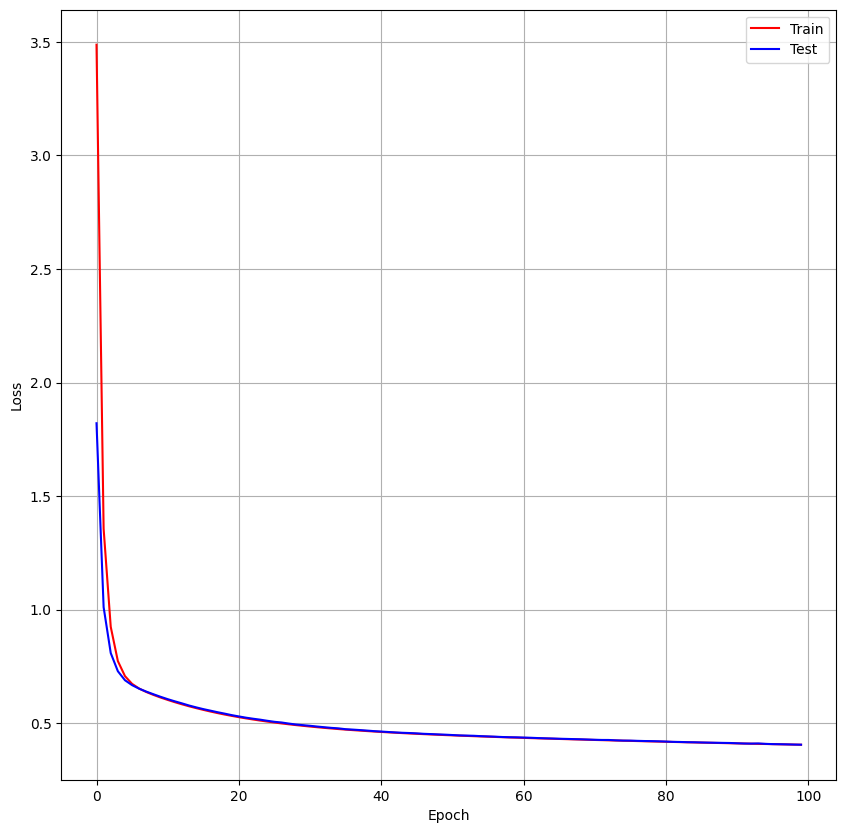

In [90]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.plot(range(num_epochs), loss_train_hist, 'r-', label='Train')
ax.plot(range(num_epochs), loss_valid_hist, 'b-', label='Test')

ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.grid(True)
ax.legend()

# **Prediction** Eval

In [91]:
yp_total = []
yt_total = []

with torch.no_grad():
  for x, y in test_loader:
    yp = model(x)
    yp_total.append(yp)
    yt_total.append(y)

In [94]:
yp_total[0].shape

torch.Size([256, 1])

In [ ]:
...

In [95]:
yp_total = []
yt_total = []

with torch.no_grad():
  for x, y in test_loader:
    yp = model(x)
    yp_total.append(yp.squeeze())
    yt_total.append(y)

In [101]:
yp_total[0].shape

torch.Size([256])

In [102]:
len(test_loader)

17

In [103]:
yp_total = torch.cat(yp_total)
yt_total = torch.cat(yt_total)

In [105]:
yp_total.shape

torch.Size([4128])

In [106]:
r2_score(yp_total, yt_total)

0.5357881637511317